In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [ ]:
dir_name = 'results_230423_newXY_2trk'

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [3]:
# binning info
totalNumBins = 12000
zMax=240
zMin=-240
binwidth = (zMax-zMin)/totalNumBins
zvals = np.linspace(zMin, zMax, totalNumBins, endpoint=False) + binwidth/2
zbins = np.linspace(zMin,zMax,totalNumBins)
bins_1mm = totalNumBins/(zMax - zMin)

In [4]:
inputs_pvf_unet = pickle.load(open(f"{dir_name}/inputs_pvf_fullcov_unet.p", "rb"))
inputs_pvf_unetpp = pickle.load(open(f"{dir_name}/inputs_pvf_fullcov_unetplusplus.p", "rb"))
outputs_pvf_unet = pickle.load(open(f"{dir_name}/outputs_pvf_fullcov_unet.p", "rb"))
outputs_pvf_unetpp = pickle.load(open(f"{dir_name}/outputs_pvf_fullcov_unetplusplus.p", "rb"))
labels_pvf_unet = pickle.load(open(f"{dir_name}/labels_pvf_fullcov_unet.p", "rb"))
labels_pvf_unetpp = pickle.load(open(f"{dir_name}/labels_pvf_fullcov_unetplusplus.p", "rb"))

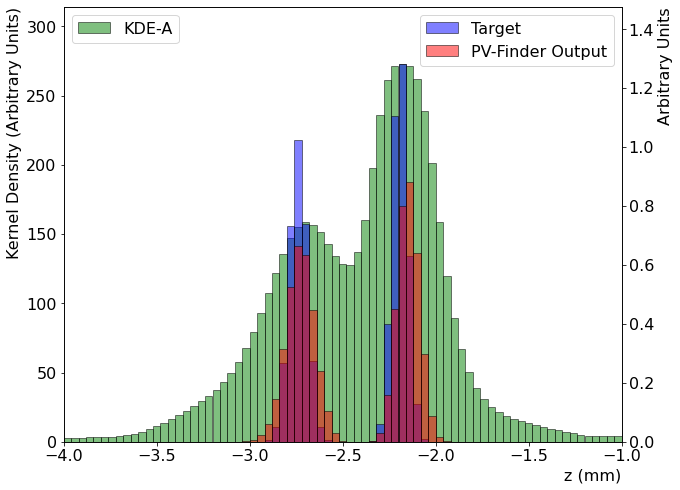

In [18]:
evtnum = 0
minind = 5890
maxind = 6000

fig,ax = plt.subplots(1,1,figsize=(10,8))
fig.patch.set_facecolor('white')
ax2 = ax.twinx()
ax.bar(zvals[minind:maxind], 
        inputs_pvf_unetpp[evtnum][0][minind:maxind],
        width=binwidth,
        color='g',
        edgecolor='k',
        alpha=0.5)
ax2.bar(zvals[minind:maxind], 
        labels_pvf_unetpp[evtnum][minind:maxind],
        width=binwidth,
        color='b',
        edgecolor='k',
        alpha=0.5)
ax2.bar(zvals[minind:maxind], 
       outputs_pvf_unetpp[evtnum][minind:maxind],
        width=binwidth,
        color='r',
        edgecolor='k',
        alpha=0.5)
ax.set_xlabel("z (mm)", horizontalalignment='right', x=1.0)
ax.set_xlim([-4,-1])
ax.set_ylim([0,1.15*max(inputs_pvf_unetpp[evtnum][0][minind:maxind])])
ax2.set_ylim([0,1.15*max(max(labels_pvf_unetpp[evtnum][minind:maxind]),max(outputs_pvf_unetpp[evtnum][minind:maxind]),)])
ax.legend(["KDE-A"], loc="upper left")
ax2.legend(["Target", "PV-Finder Output"], loc="upper right")
ax.set_ylabel("Kernel Density (Arbitrary Units)", horizontalalignment='right', y=1.0)
ax2.set_ylabel("Arbitrary Units", horizontalalignment='right', y=1.0)
font = {'family': 'helvetica',
        'weight': 'bold',
        'size': 16,
        }
plt.show()